In [14]:

import mpld3 
mpld3.enable_notebook()
import statsmodels.api as sm
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import datetime, math
import scipy.stats as sci
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

style.use('ggplot')
import seaborn as sns
sns.set()


In [15]:
df = pd.read_csv("AFL.csv")
df.tail()

,date,high,low,close,volume,open
272,7/17/2012,107.0,103.0,107.0,270442.0,102.0
273,7/18/2012,109.0,106.0,108.0,72030.0,107.0
274,7/19/2012,106.0,104.0,104.0,31340.0,108.0
275,7/22/2012,110.0,106.0,109.0,232132.0,104.0
276,7/23/2012,109.0,105.0,107.0,243920.0,109.0


In [16]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
df = df.drop(columns=['date'])
df = df.drop(columns=['volume'])
df_close = pd.DataFrame(df['close'])
print(df_close.tail(10))

df.size


            close
date             
2012-06-14  130.0
2012-07-02  128.0
2012-07-03  123.0
2012-07-15  111.0
2012-07-16  102.0
2012-07-17  107.0
2012-07-18  108.0
2012-07-19  104.0
2012-07-22  109.0
2012-07-23  107.0


1108

In [17]:
forecast_col = 'close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)

df['label'] = df[forecast_col].shift(-forecast_out)
df

3


,high,low,close,open,label
date,,,,,
2010-04-15,247.0,240.0,240.0,243.0,240.0
2010-04-20,240.0,236.0,240.0,240.0,236.0
2010-04-25,240.0,240.0,240.0,240.0,240.0
2010-04-27,240.0,240.0,240.0,240.0,225.0
2010-04-28,240.0,236.0,236.0,240.0,226.0
...,...,...,...,...,...
2012-07-17,107.0,103.0,107.0,102.0,109.0
2012-07-18,109.0,106.0,108.0,107.0,107.0
2012-07-19,106.0,104.0,104.0,108.0,NaN


In [18]:
# df.dropna(inplace=True)


In [19]:
pearson_coeff, p_value = sci.pearsonr(df["high"], df["label"])
print(pearson_coeff, p_value)
pearson_coeff, p_value = sci.pearsonr(df["low"], df["label"])
print(pearson_coeff, p_value)
pearson_coeff, p_value = sci.pearsonr(df["close"], df["label"])
print(pearson_coeff, p_value)
pearson_coeff, p_value = sci.pearsonr(df["open"], df["label"])
print(pearson_coeff, p_value)

ValueError: array must not contain infs or NaNs

In [ ]:
corr = df.corr()
sns.heatmap(corr)

In [20]:
#Defining Features & Labels
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
# X = preprocessing.normalize(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

print(len(X), len(y))
print(X_lately)
print(X)
print(y)

274 274
[[-1.33068432 -1.33674477 -1.3494317  -1.289358  ]
 [-1.26196382 -1.30212638 -1.26331232 -1.35827304]
 [-1.27914395 -1.31943558 -1.29776007 -1.27212925]]
[[ 1.09171314  1.01730576  0.99301559  1.03652442]
 [ 0.97145227  0.94806898  0.99301559  0.98483814]
 [ 0.97145227  1.01730576  0.99301559  0.98483814]
 ...
 [-1.27914395 -1.38867236 -1.38387946 -1.23767173]
 [-1.3135042  -1.35405397 -1.29776007 -1.39273056]
 [-1.27914395 -1.30212638 -1.28053619 -1.30658676]]
[240. 236. 240. 225. 226. 222. 230. 230. 226. 221. 243. 251. 265. 290.
 300. 289. 284. 279. 284. 289. 294. 294. 289. 284. 283. 278. 278. 275.
 265. 264. 251. 235. 236. 235. 235. 231. 243. 233. 234. 237. 233. 230.
 232. 236. 240. 240. 242. 242. 242. 244. 248. 249. 250. 247. 244. 232.
 236. 233. 236. 233. 233. 218. 219. 226. 226. 230. 227. 227. 223. 223.
 219. 222. 222. 222. 226. 226. 230. 234. 234. 234. 238. 242. 243. 252.
 262. 265. 263. 265. 260. 260. 255. 252. 252. 251. 251. 247. 243. 236.
 232. 229. 225. 229. 223. 219

[126.67007382 115.78215248 130.25487449 207.76828735 126.55512609
 163.55973668 258.71258802 119.55828246 248.14055117 133.29087608
 127.43547693 110.88030224 127.43547693 225.45874682 246.60072387
 269.23987009 218.41113245 155.77808175 234.77120797 129.18633491
 228.53976744 202.31474771 124.51735633 156.57836702 229.56969793
 223.88328663 255.83278333 112.80655802 125.62073514 230.5424048
 157.64686366 204.65561101 221.71141118 117.74672417 215.87516998
 172.86235414 115.49528364 236.7166217  213.64079074 118.25368772
 230.53603779 125.39452366 125.43049267 215.87516998 278.18588331
 125.27982617 130.2931904  129.41602307 124.32309376 233.72186928
 127.39716102 170.8057196  274.12288449 218.8699224  128.57717165]
   Actual   Predicted
0   121.0  126.670074
1   130.0  115.782152
2   127.0  130.254874
3   202.0  207.768287
4   125.0  126.555126
5   155.0  163.559737
6   260.0  258.712588
7   116.0  119.558282
8   232.0  248.140551
9   132.0  133.290876


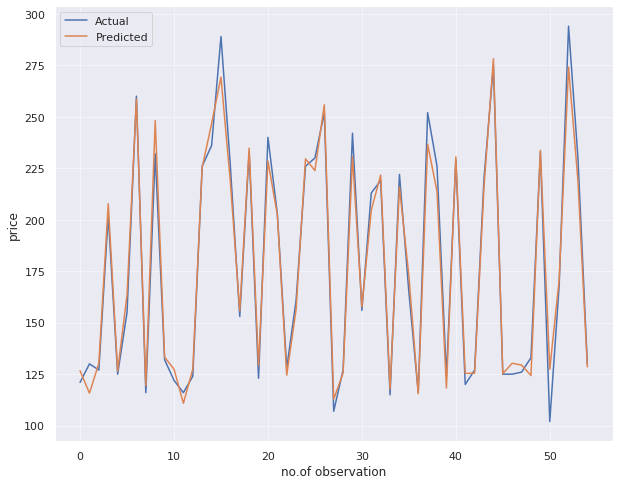

The R^2 value is: 0.9791422158332116


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
clf = LinearRegression() 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_test.head(10))
df_test.plot(figsize=(10,8))
plt.grid(which='major', linewidth='0.5')
plt.grid(which='minor', linewidth='0.5')
plt.xlabel('no.of observation')
plt.ylabel('price')
plt.show()


Accuracy = clf.score(X_test, y_test)
print("The R^2 value is:", Accuracy)




# X_main=sm.add_constant(X_train)
# model = sm.OLS(y_train, X_main).fit()
# # y_pred = model.predict(X_test)
# print(model.summary())

/home/sunil/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: Object of type ndarray is not JSON serializable

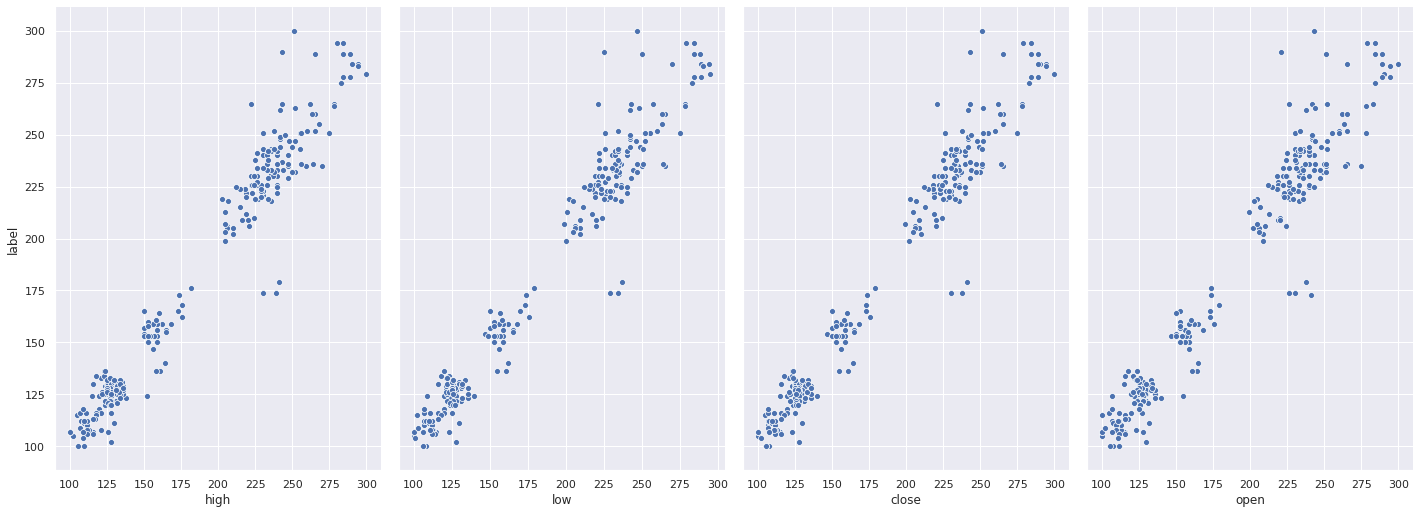

TypeError: Object of type ndarray is not JSON serializable

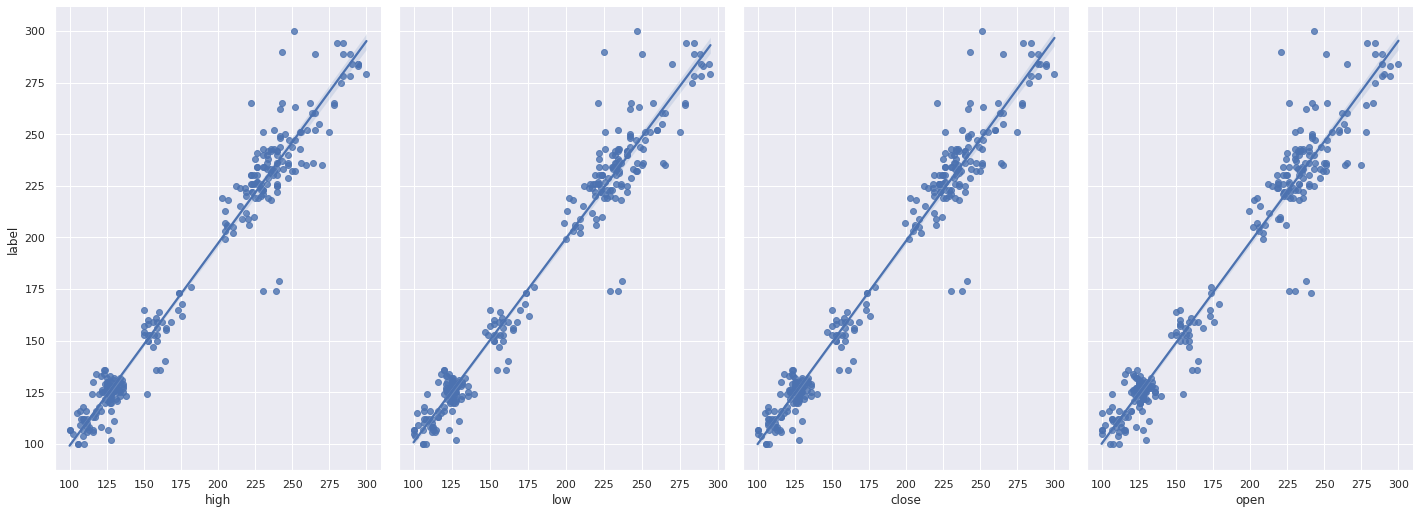

In [22]:
sns.pairplot(df, x_vars=['high','low','close', 'open'], y_vars='label', size=7, aspect=0.7)
sns.pairplot(df, x_vars=['high','low','close', 'open'], y_vars='label', size=7, aspect=0.7, kind='reg')

3
3 274 [103.82280124 110.60936491 107.88261656] 0.9791422158332116 3


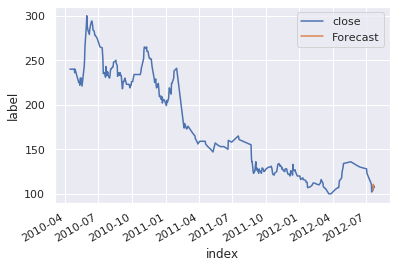

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

forecast_set = clf.predict(X_lately)
print(len(forecast_set))
print(len(X_lately),len(X),forecast_set, Accuracy, forecast_out)
df['Forecast'] = np.nan


last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

    

df_close['close'].plot()
df['Forecast'].plot()

plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('label')
plt.show()

# ax1 = sns.distplot(df['close'], hist=False, color="r", label="actual")
# ax2 = sns.distplot(df['label'], hist=False, color="b", label="predicted", ax=ax1)
# sns.distplot(df['Forecast'], hist=False, color="g", label="predicted", ax=ax2)

In [24]:
print(clf.intercept_)
print(clf.coef_)

180.80088042177886
[ -5.56105031 -31.87262027  95.16404142  -1.11197535]


In [25]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [26]:
print(regression_results(y_test, y_pred))

explained_variance:  0.9792
mean_squared_log_error:  0.0024
r2:  0.9791
MAE:  6.089
MSE:  66.5403
RMSE:  8.1572
None


In [133]:
fstat = (Accuracy/(1-Accuracy))*((274-4-1)/4) #you should find N and K yourself
fstat

3156.9659311956707